# Hotel Booking Analysis (2015, 2016 and 2017)

## 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the dataset

In [3]:
df=pd.read_csv("hotel_booking.csv")      #Load .csv file or load dataset
df=df.drop(columns=['name','email','phone-number', 'credit_card'])    #drop some columns

## 3. Exploratory Data Analysis and Data Cleaning

In [4]:
df.head(3) # show rows from top

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [5]:
df.tail(3) # show last rows 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.shape # to know the shape of dataframe

(119390, 32)

In [7]:
df.columns  #list of columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()   #to check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])  # convert object to datetime datatype

In [10]:
df.describe(include = "object")          #describe function only use for numeric value but if you use include = 'object', then you will get summary statistics for object

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print('*'*100)

hotel
['Resort Hotel' 'City Hotel']
****************************************************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
****************************************************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
****************************************************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

## 4. Remove NULL values

In [12]:
df.isnull().sum()   #df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df=df.drop(columns=["agent","company"])  #drop because it has more NaN values

In [14]:
df.dropna(inplace=True)
df.shape

(118898, 30)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.describe()   # remove outliers

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [17]:
df=df[df["adr"]<5000]

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## 5. Data Analysis and Visualization

#### 5.1 - Count Canceled and Non canceled reservation

In [19]:
cancellation_perc= df["is_canceled"].value_counts(normalize=True)
cancellation_perc           # 1 = canceled

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

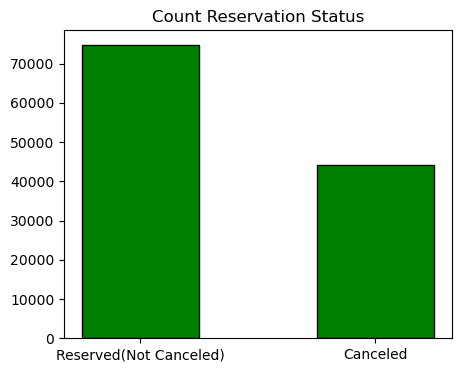

In [20]:
plt.figure(figsize = (5,4))     #set size of the plot
plt.title("Count Reservation Status")
plt.bar(["Reserved(Not Canceled)","Canceled"],df["is_canceled"].value_counts(), edgecolor = 'k', color='g', width = 0.5)
plt.show()

#### 5.2 - Reservation Status of Different Hotels

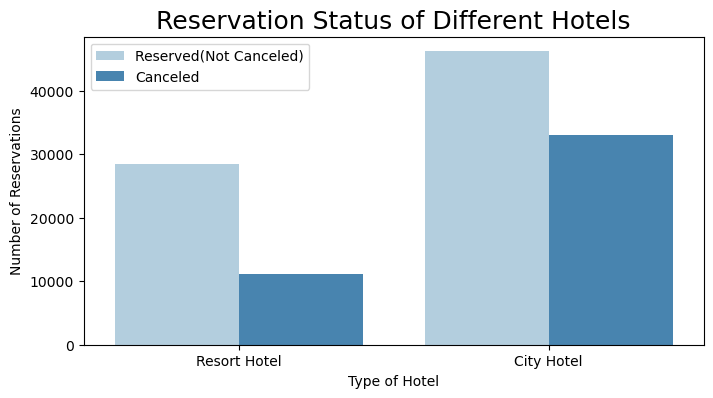

In [21]:
plt.figure(figsize = (8,4))

ax1= sns.countplot(x="hotel", hue = "is_canceled", data= df, palette="Blues")
legend_labels,_=ax1. get_legend_handles_labels()

ax1.legend(bbox_to_anchor=(1,1))
plt.legend(["Reserved(Not Canceled)","Canceled"])

plt.title("Reservation Status of Different Hotels", size=18)
plt.xlabel("Type of Hotel")
plt.ylabel("Number of Reservations")

plt.show()

In [22]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]            #filter 
resort_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [23]:
city_hotel = df[df["hotel"] == "City Hotel"]            #filter 
city_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [24]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

#### 5.3 - Average Daily Rate of City and Resort Hotel

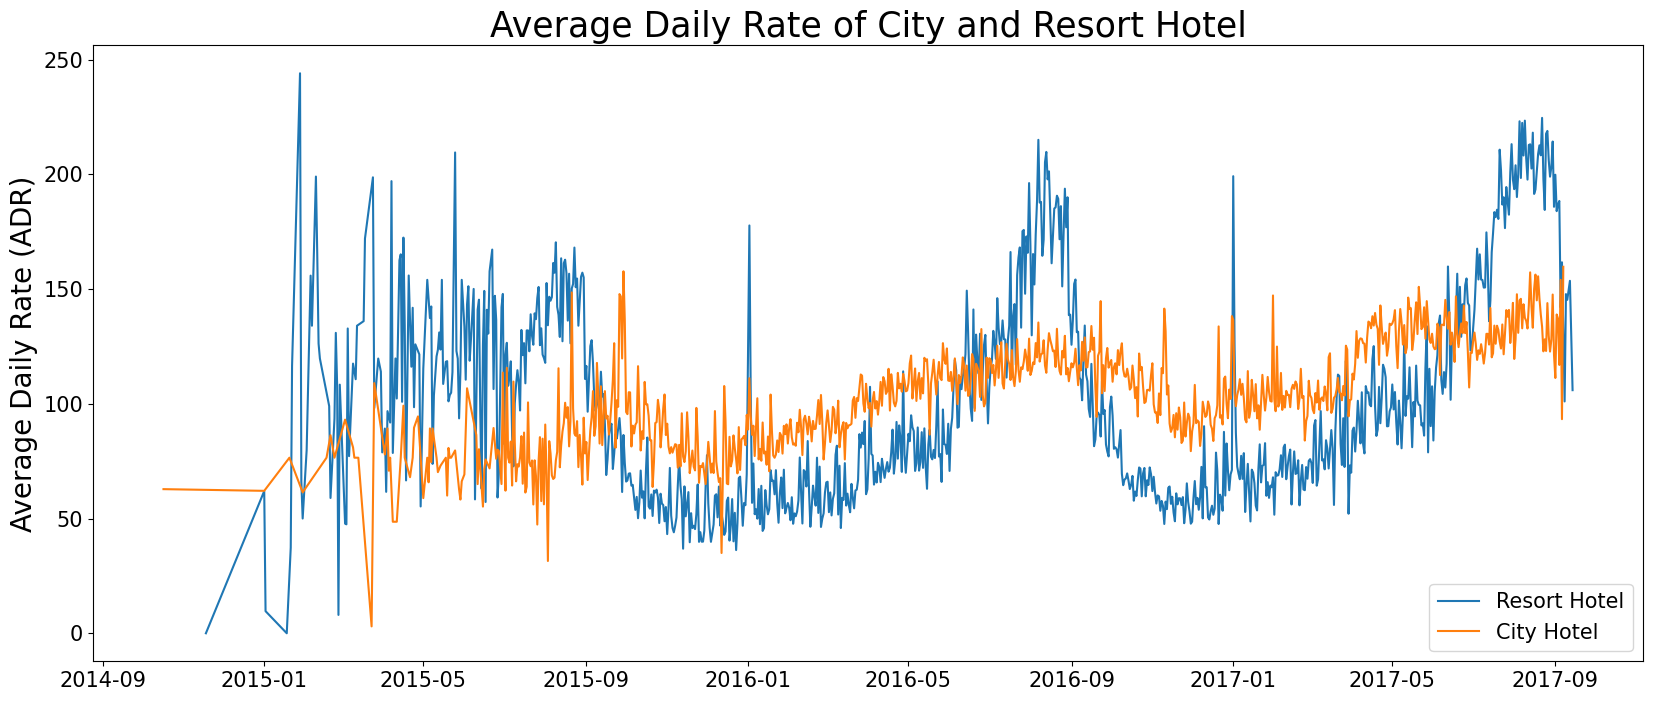

In [25]:
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate of City and Resort Hotel", size=25)
plt.plot(resort_hotel.index, resort_hotel['adr'], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label="City Hotel")
plt.legend(fontsize=15)


#plt.xlabel("Date")
plt.ylabel("Average Daily Rate (ADR)", size =20)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.grid(True)
plt.show()


#### 5.4 - Reservation Status per Month

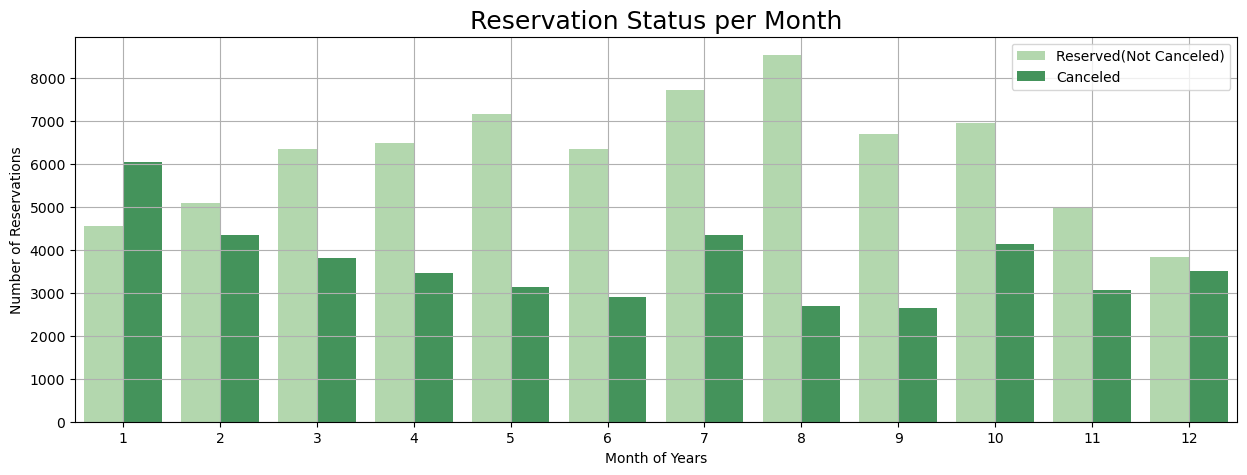

In [35]:
df['month'] = df["reservation_status_date"].dt.month         #date to month
plt.figure(figsize = (15,5))

ax1= sns.countplot(x="month", hue = "is_canceled", data= df, palette="Greens")


ax1.legend(bbox_to_anchor=(1,1))
plt.legend(["Reserved(Not Canceled)","Canceled"])

plt.title("Reservation Status per Month", size=18)
plt.xlabel("Month of Years")
plt.ylabel("Number of Reservations")
plt.grid(True)
plt.show()

#### 5.5 - ADR per Month

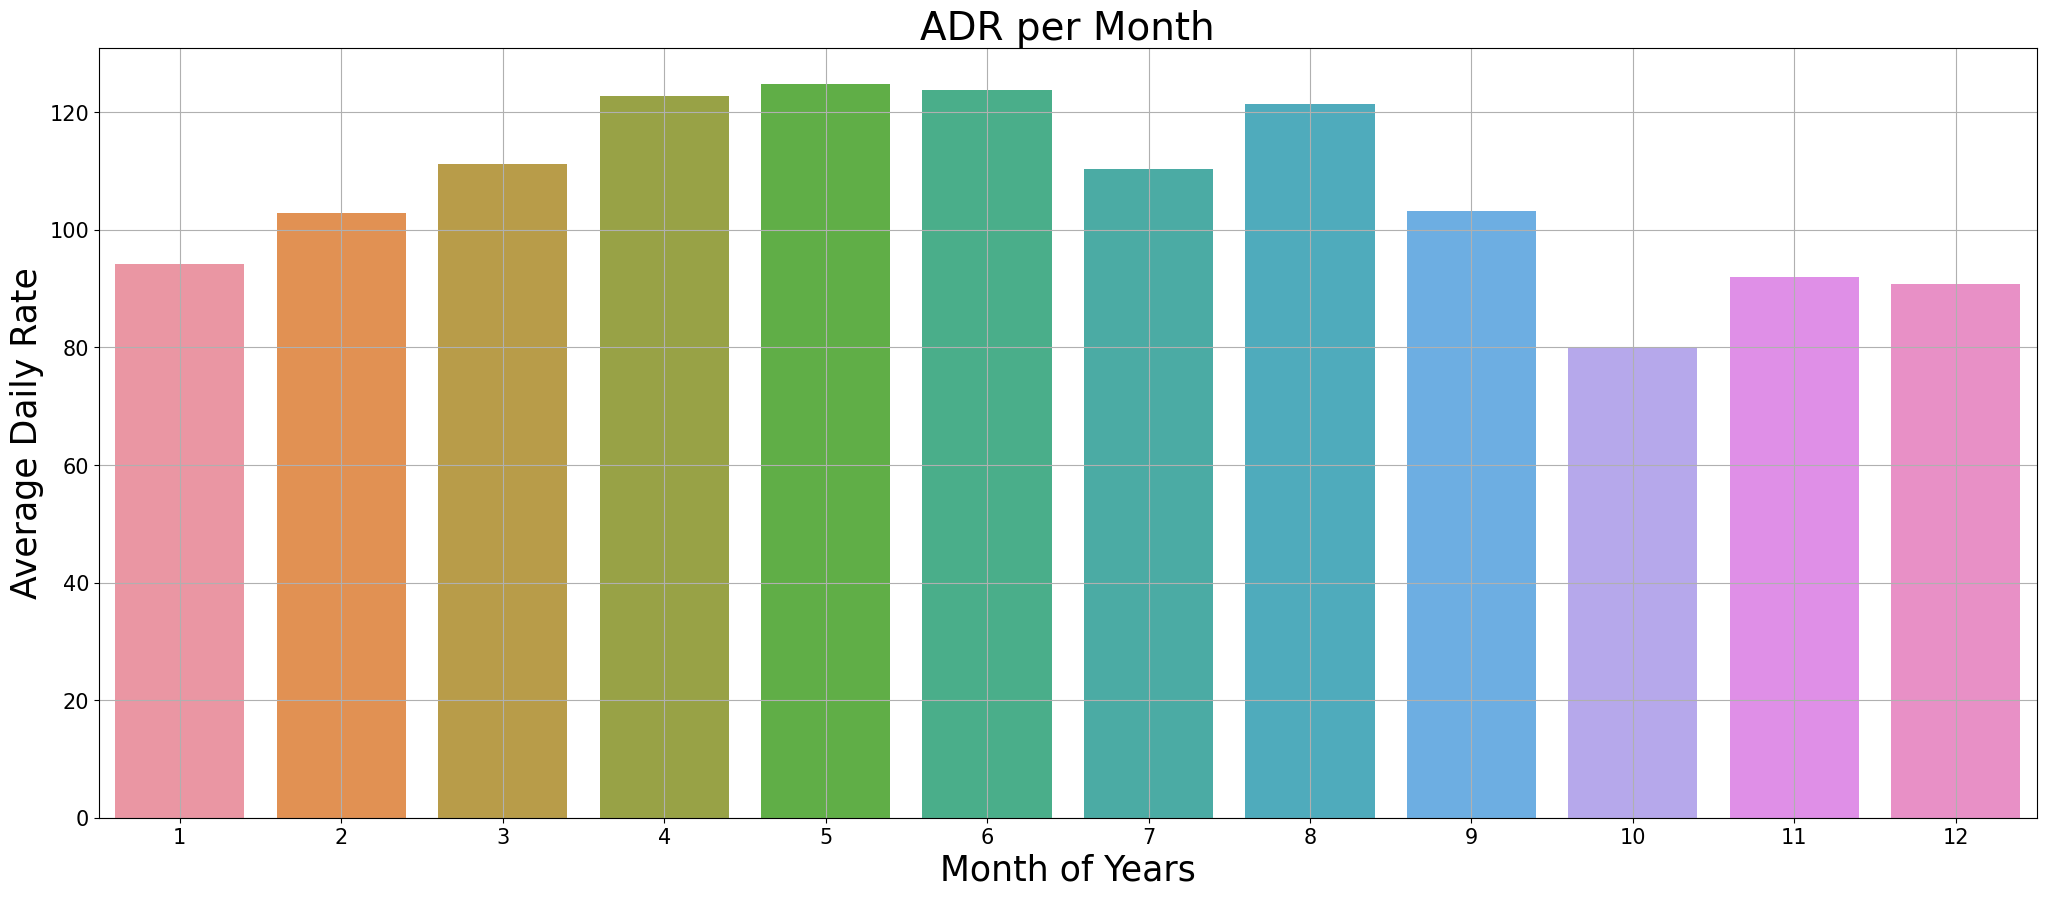

In [36]:
plt.figure(figsize = (25,10))
plt.title("ADR per Month", fontsize = 28)

sns.barplot(x="month", y="adr", data = df[df["is_canceled"]==1].groupby("month")[["adr"]].mean().reset_index())

plt.xticks(size=15)
plt.yticks(size=15)

plt.xlabel("Month of Years",size=25)
plt.ylabel("Average Daily Rate",size=25)
plt.grid(True)
plt.show()

#### 5.6 - Compare Top 10 Countries with Cancellation Rate

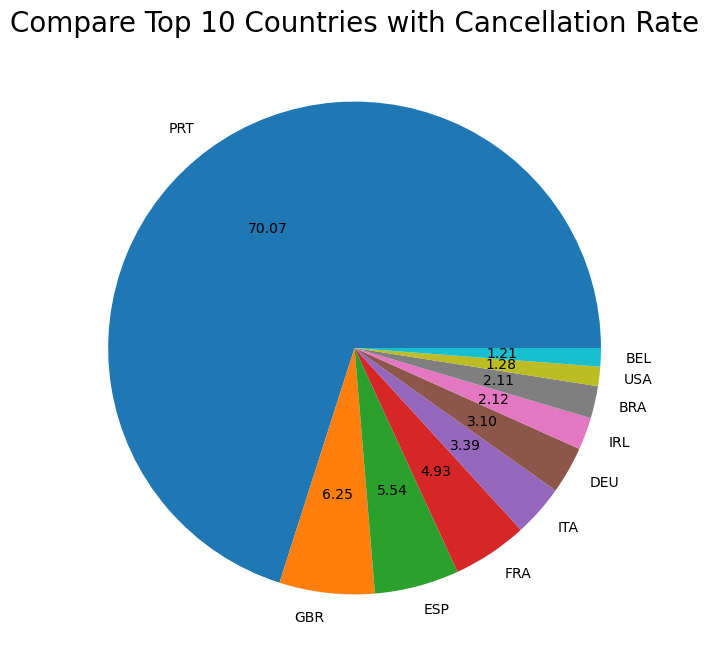

In [37]:
cancelled_data = df[df["is_canceled"]==1]
top_10_country= cancelled_data["country"].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title("Compare Top 10 Countries with Cancellation Rate", size=20)
plt.pie(top_10_country, autopct = "%.2f", labels= top_10_country.index)
plt.show()

In [38]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [39]:
df["market_segment"].value_counts(normalize =True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [40]:
cancelled_data["market_segment"].value_counts(normalize= True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

#### 5.7 - Average Daily Rate (ADR)

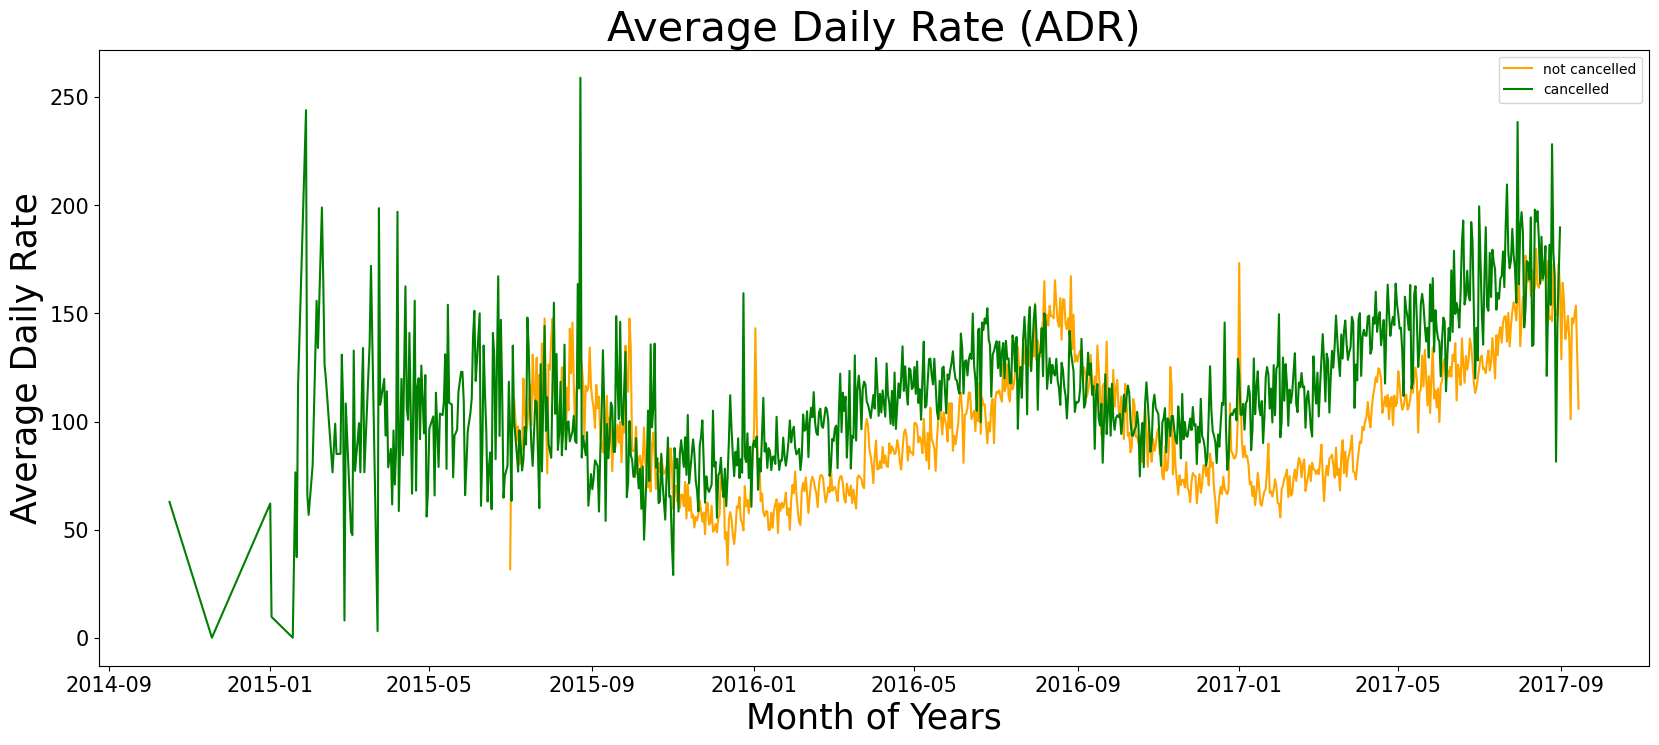

In [45]:
cancelled_df_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace = True)
#cancelled_df_adr.sort_values("reservation_status_date", inplace=True)

not_cancelled_data= df[df["is_canceled"]==0]
not_cancelled_df_adr = not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace= True)
#not_cancelled_df_adr.sort_values("reservation_status_date", inplace= True)

plt.figure(figsize=(20,8))
plt.title("Average Daily Rate (ADR)",size =30)
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr['adr'], label = "not cancelled", color="orange")
plt.plot(cancelled_df_adr["reservation_status_date"], cancelled_df_adr['adr'], label = "cancelled", color= "green")
plt.legend()

plt.xticks(size=15)
plt.yticks(size=15)

plt.xlabel("Month of Years",size=25)
plt.ylabel("Average Daily Rate",size=25)

plt.show()

In [43]:
cancelled_df_adr =cancelled_df_adr[cancelled_df_adr["reservation_status_date"]> "2015-12"]   #& cancelled_df_adr[]]
not_cancelled_df_adr =not_cancelled_df_adr[not_cancelled_df_adr["reservation_status_date"]> "2015-12"]   #& cancelled_df_adr[]]                                  
                                                                

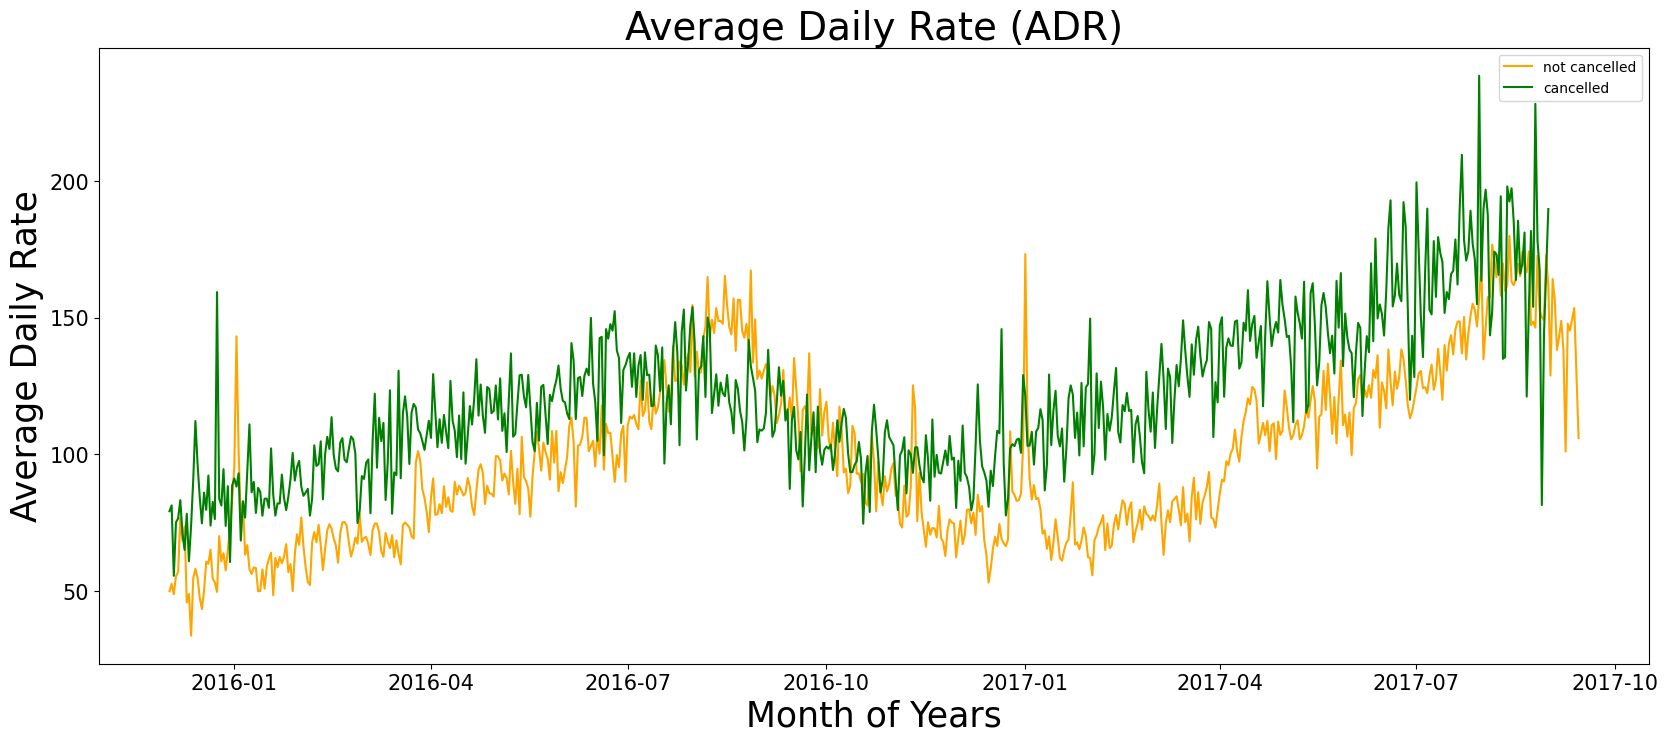

In [44]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate (ADR)", size = 28)
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr['adr'], label = "not cancelled", color="orange")
plt.plot(cancelled_df_adr["reservation_status_date"], cancelled_df_adr['adr'], label = "cancelled", color= "green")
plt.legend()

plt.xticks(size=15)
plt.yticks(size=15)

plt.xlabel("Month of Years",size=25)
plt.ylabel("Average Daily Rate",size=25)

plt.show()